<a href="https://colab.research.google.com/github/skilove13/NLP-Specialization-Cousera/blob/main/NLP_C1_W1_lecture_nb_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Visualizing tweets and the Logistic Regression model**

Objectives: Visualize and interpret the logistic regression model

Steps:

Plot tweets in a scatter plot using their positive and negative sums.
Plot the output of the logistic regression model in the same plot as a solid line
Import the required libraries
We will be using NLTK, an opensource NLP library, for collecting, handling, and processing Twitter data. In this lab, we will use the example dataset that comes alongside with NLTK. This dataset has been manually annotated and serves to establish baselines for models quickly.

So, to start, let's import the required libraries.

In [8]:
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt            # visualization library
import numpy as np                         # library for scientific computing and matrix operations
import re 
import string 
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

from os import getcwd
import pandas as pd                 # Library for Dataframes 

In [2]:
# download the stopwords for the process_tweet function
nltk.download('stopwords')

!pip install utils
import numpy as np

def process_tweet(tweet):
  stemmer = PorterStemmer()
  stopwords_english = stopwords.words('english')
  tweet = re.sub(r'\$\w*', '', tweet)
  tweet = re.sub(r'^RT[\s]+', '', tweet)
  tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
  tweet = re.sub(r'#', '', tweet)
  tokenizer = TweetTokenizer(preserve_case=False,        strip_handles=True,reduce_len=True)
  tweet_tokens = tokenizer.tokenize(tweet)
  
  tweets_clean = []
  for word in tweet_tokens:
    if (word not in stopwords_english and word not in string.punctuation): 
      stem_word = stemmer.stem(word)  # stemming word
      tweets_clean.append(stem_word)
  return tweets_clean

def build_freqs(tweets, ys):
    """Build frequencies.
    Input:
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet (either 0 or 1)
    Output:
        freqs: a dictionary mapping each (word, sentiment) pair to its frequency
    """
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# **Load the NLTK sample dataset**

To complete this lab, you need the sample dataset of the previous lab. Here, we assume the files are already available, and we only need to load into Python lists.

In [6]:
nltk.download('twitter_samples')

# select the lists of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

# concatenate the lists, 1st part is the positive tweets followed by the negative
tweets = all_positive_tweets + all_negative_tweets
labels = np.append(np.ones((len(all_positive_tweets),1)), np.zeros((len(all_negative_tweets),1)), axis = 0)

# split the data into two pieces, one for training and one for testing (validation set) 
train_pos = all_positive_tweets[:4000]
train_neg = all_negative_tweets[:4000]

train_x = train_pos + train_neg

print('Number of tweets:', len(train_x))

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
Number of tweets: 8000


**Load the extracted features**

Part of this week's assignment is the creation of the numerical features needed for the Logistic regression model. In order not to interfere with it, we have previously calculated and stored these features in a CSV file for the entire training set.

So, please load these features created for the tweets sample.


In [11]:
!pwd
data = pd.read_csv('logistic_features.csv'); # Load a 3 columns csv file using pandas function
data.head(10) # Print the first 10 data entries

/content


,bias,positive,negative,sentiment
0,1.0,3020.0,61.0,1.0
1,1.0,3573.0,444.0,1.0
2,1.0,3005.0,115.0,1.0
3,1.0,2862.0,4.0,1.0
4,1.0,3119.0,225.0,1.0
5,1.0,2955.0,119.0,1.0
6,1.0,3934.0,538.0,1.0
7,1.0,3162.0,276.0,1.0
8,1.0,628.0,189.0,1.0
9,1.0,264.0,112.0,1.0


Now let us get rid of the data frame to keep only Numpy arrays.

In [14]:
X = data[['bias','positive','negative']].values # Get only the numerical values of the dataframe
Y = data['sentiment'].values  # Put in Y the corresponding lables or sentiments

print(X.shape) # Print the shape of the X part
print(X)  # Print some rows of X

(8000, 3)
[[1.000e+00 3.020e+03 6.100e+01]
 [1.000e+00 3.573e+03 4.440e+02]
 [1.000e+00 3.005e+03 1.150e+02]
 ...
 [1.000e+00 1.440e+02 7.830e+02]
 [1.000e+00 2.050e+02 3.890e+03]
 [1.000e+00 1.890e+02 3.974e+03]]


# **Load a pretrained Logistic Regression model**

In the same way, as part of this week's assignment, a Logistic regression model must be trained. The next cell contains the resulting model from such training. Notice that a list of 3 numeric values represents the whole model, that we have called theta .

In [32]:
theta = [7e-08, 0.0005239, -0.00055517]

**Plot the samples in a scatter plot**

The vector theta represents a plane that split our feature space into two parts. Samples located over that plane are considered positive, and samples located under that plane are considered negative. Remember that we have a 3D feature space, i.e., each tweet is represented as a vector comprised of three values: [bias, positive_sum, negative_sum], always having bias = 1.

If we ignore the bias term, we can plot each tweet in a cartesian plane, using positive_sum and negative_sum. In the cell below, we do precisely this. Additionally, we color each tweet, depending on its class. Positive tweets will be green and negative tweets will be red.

Text(0, 0.5, 'Negative')

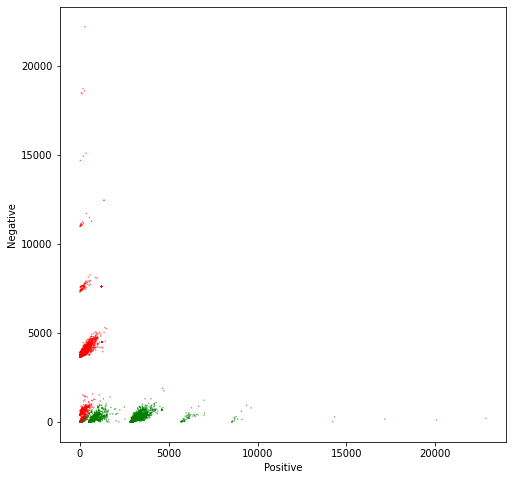

In [16]:
# Plot the samples using columns 1 and 2 of the matrix

fig , ax = plt.subplots(figsize = (8,8))

colors = ['red', 'green']
# Color based on the sentiment Y
ax.scatter(X[:,1], X[:,2], c=[colors[int(k)] for k in Y], s = 0.1)  # Plot a dot for each pair of words
plt.xlabel("Positive")
plt.ylabel("Negative")


From the plot, it is evident that the features that we have chosen to represent tweets as numerical vectors allow an almost perfect separation between positive and negative tweets. So you can expect a very high accuracy for this model!

# **Plot the model alongside the data**
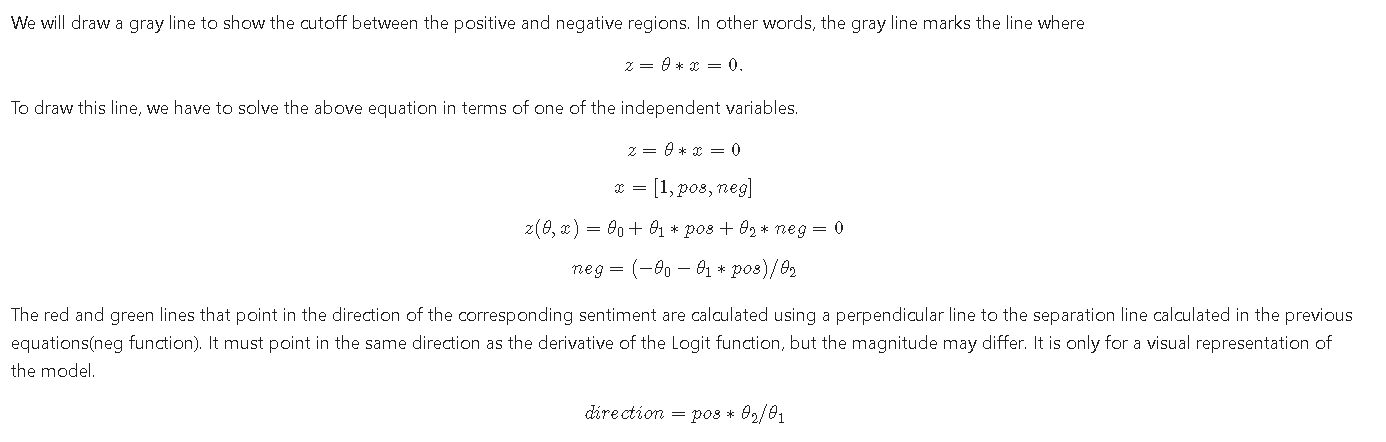

In [30]:
# Equation for the separation plane
# It give a value in the negative axe as a function of a positive value
# f(pos, neg, W) = w0 + w1 * pos + w2 * neg = 0
# s(pos, W) = (w0 - w1 * pos) / w2

#neg = (-theta[0] - theta[1]*pos/theta[2])
def neg(theta, pos):
  return [-theta[0] - pos*theta[1]/theta[2]]

#df(pos, W) = pos * w2 / w1 
def direction(theta, pos):
    return    pos * theta[2] / theta[1]


The green line in the chart points in the direction where z > 0 and the red line points in the direction where z < 0. The direction of these lines are given by the weights theta[1] and theta[2] 

22847.0


TypeError: ignored

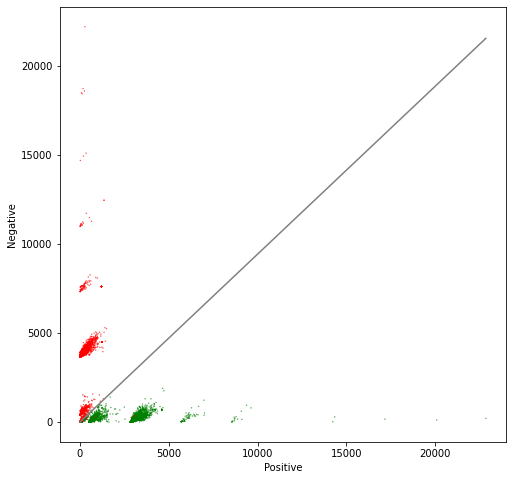

In [33]:
fig , ax = plt.subplots(figsize = (8,8))

colors = ['red', 'green']

# Color based on the sentiment Y
ax.scatter(X[:,1], X[:,2], c=[colors[int(k)] for k in Y], s = 0.1)  # Plot a dot for each pair of words
plt.xlabel("Positive")
plt.ylabel("Negative")

# Now lets represent the logistic regression model in this chart. 
maxpos = np.max(X[:,1])

print(maxpos)

offset = 5000 # The pos value for the direction vectors origin

# Plot a gray line that divides the 2 areas.
ax.plot([0, maxpos], [neg(theta,0), neg(theta, maxpos)], color = 'gray')


# Plot a green line pointing to the positive direction
ax.arrow(offset, neg(theta, offset), offset, direction(theta, offset), head_width=500, head_length=500, fc='g', ec='g')
# Plot a red line pointing to the negative direction
ax.arrow(offset, neg(theta, offset), -offset, -direction(theta, offset), head_width=500, head_length=500, fc='r', ec='r')

plt.show()
